# Increasing and Decreasing Boundary Curvature

This notebook demonstrates how elastica curves behave under varying boundary curvature conditions. 

## What is Boundary Curvature?

Boundary curvature refers to the rate of change in the tangent direction at the endpoints of our elastica curve. In the mathematical model:

- A circle of radius R has constant curvature of 1/R
- Increasing the curvature (adding positive values to baseline) makes the curve bend more sharply
- Decreasing the curvature (adding negative values to baseline) makes the curve bend more gradually


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# add parent directory to path
import sys
import os
sys.path.append(os.path.abspath('..'))

from src.elastica import elastica_in_TI
from src.visualization.drawing import build_circle
from src.visualization.plotting import plot_curves


## Experiment Setup

We start with a baseline circle of radius R = √3, which has a curvature of 1/R. Then we systematically vary the boundary curvature by adding or subtracting values from this baseline:

- Positive a-values (0.3, 0.6, 0.9): Increase curvature at boundaries
- Negative a-values (-0.3, -0.5): Decrease curvature at boundaries

The code computes optimal elastica curves connecting the inducer segments while maintaining the modified boundary curvatures. The visualization shows how these changes affect the overall shape of the completion curve.

In [2]:
# Parameters for a circle of R=sqrt(3)
dx = 1.2247
R = np.sqrt(3)
tl, x, y, theta, dtheta, ddtheta, err = elastica_in_TI(-dx, 0, 45, -1/R, dx, 0, -45, -1/R, 0.001, [0, 0, 0, np.sqrt(3)*np.pi/2], 1)

# Increasing and decreasing boundary curvature
a_values = [0.3, 0.6, 0.9, -0.3, -0.5]
# Params for fast optimization
params = [
    [0.15, -1.61, 0.75, 3.0244387],
    [0.28, -1.35, 2.26, 2.64],
    [0.25, -1.55, 4.9, 2.6],
    [0.27, 1.37, -0.4, 2.77],
    [-0.53, -1.56, -0.599, 2.88]
]

ETB_results = dict()
for ii, (a, param) in enumerate(zip(a_values, params)):
    inducers = {
        'left': [-dx, 0, 45, -1/R-a],
        'right': [dx, 0, -45, -1/R-a],
    }
    tl, x, y, theta, dtheta, ddtheta, err = elastica_in_TI(-dx, 0, 45, -1/R-a, dx, 0, -45, -1/R-a, 0.001, param, 1)
    completion = {
        'tl': tl,
        'x': x,
        'y': y,
        'theta': theta,
        'dtheta': dtheta,
        'ddtheta': ddtheta,
        'err': err
    }
    ETB_results[f"curve_{ii}"] = {"inducers": inducers, "completion": completion, "opt": param}


Elastica in TI: err:0.000428 c:-0.000015 phi:0.000098 g0:0.000103 l=2.721801
Elastica in TI: err:0.002542 c:0.158646 phi:-1.653045 g0:0.758771 l=2.672377


/home/guy/code/ETB/src/elastica.py:39: RuntimeWarning: overflow encountered in scalar power
  prev_dddtheta = ((k**2)/hbars - 2*k**4 - 3*k**6 + ddtheta[p-1]**2 +
/home/guy/code/ETB/src/elastica.py:39: RuntimeWarning: invalid value encountered in scalar add
  prev_dddtheta = ((k**2)/hbars - 2*k**4 - 3*k**6 + ddtheta[p-1]**2 +
/home/guy/code/ETB/src/elastica.py:40: RuntimeWarning: overflow encountered in scalar power
  7*hbars*ddtheta[p-1]**2*k**2) / (2*k*(1+hbars*k**2)) - \
/home/guy/code/ETB/src/elastica.py:41: RuntimeWarning: overflow encountered in scalar power
  (c*np.sin(theta[p-1]+phi)*(1+hbars*k**2)**3) / (2*hbars*k)
/home/guy/code/ETB/src/elastica.py:39: RuntimeWarning: invalid value encountered in scalar subtract
  prev_dddtheta = ((k**2)/hbars - 2*k**4 - 3*k**6 + ddtheta[p-1]**2 +


Elastica in TI: err:0.000952 c:0.234266 phi:-1.561727 g0:2.159165 l=2.638506
Elastica in TI: err:0.002984 c:0.268241 phi:-1.614543 g0:4.686041 l=2.617727
Elastica in TI: err:0.001495 c:0.283089 phi:1.545404 g0:-0.402576 l=2.803491
Elastica in TI: err:0.001568 c:-0.534054 phi:-1.574522 g0:-0.596931 l=2.886966


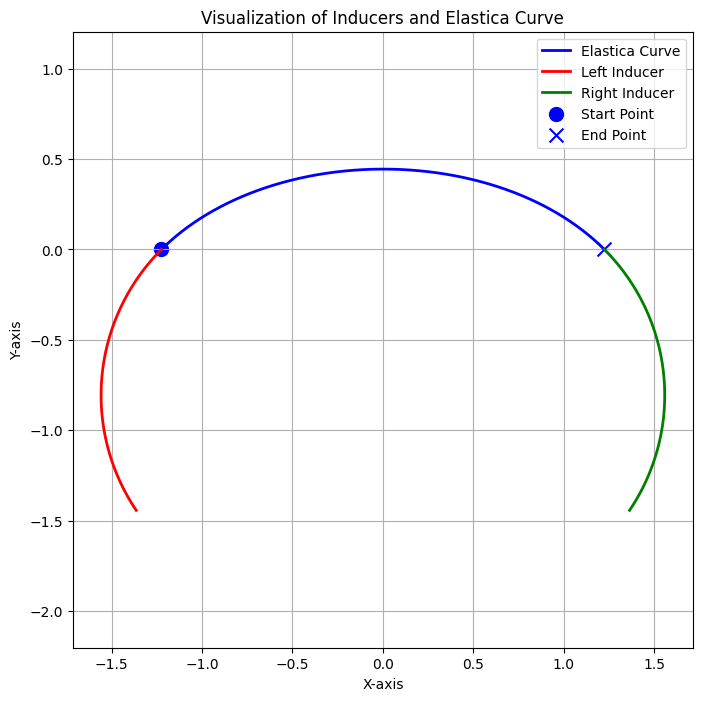

In [16]:
from src.visualization.drawing import draw_left_inducer, draw_right_inducer

# plot the curves with inducers and completion
fig, ax = plt.subplots(figsize=(8, 8))

curve = ETB_results["curve_0"]  # Example for the first curve
# Extract data for the current curve
inducers = curve['inducers']
completion = curve['completion']
arc_perimeter = np.pi / 2  # Common arc perimeter value

# Get coordinates from the completion
x_coords = completion['x']
y_coords = completion['y']

# Get inducer parameters
left_inducer = inducers['left']
right_inducer = inducers['right']

# Import drawing functions if not already imported

# Draw inducers
M_left = draw_left_inducer(left_inducer[0], left_inducer[1], left_inducer[2], left_inducer[3], arc_perimeter)
M_right = draw_right_inducer(right_inducer[0], right_inducer[1], right_inducer[2], right_inducer[3], arc_perimeter)

# Plot the completion curve
ax.plot(x_coords, y_coords, 'b', linewidth=2, label='Elastica Curve')

# Plot the inducers
ax.plot(M_left.real, M_left.imag, 'r', linewidth=2, label='Left Inducer')
ax.plot(M_right.real, M_right.imag, 'g', linewidth=2, label='Right Inducer')

# Add markers for endpoints
ax.scatter(x_coords[0], y_coords[0], color='blue', s=100, marker='o', label='Start Point')
ax.scatter(x_coords[-1], y_coords[-1], color='blue', s=100, marker='x', label='End Point')

# Format the plot
ax.set_title('Visualization of Inducers and Elastica Curve')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.axis('equal')
ax.grid(True)
ax.legend(loc='best')